These are study notes from the book [Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do), by Andreas C. Müller and Sarah Guido. As Python is currently a new language to me, I found useful to write down the code and some discussions presented on the book. The material below, except some notes done by myself, is taken from the chapter one, "Introduction".

In [1]:
########## A FIRST APPLICATION: CLASSIFIYING IRIS SPECIES ##########
import numpy as np
import matplotlib.pyplot as plt

In [2]:
########## MEET THE DATA ##########
from sklearn.datasets import load_iris
iris = load_iris()
# The iris object that is returned by load_iris is a Bunch object, which is very
# similar to a dictionary. It contains keys and values.
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# The value to to key DESCR is a short description of the data set.
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
# We could show only the beginning of the description.
print(iris['DESCR'][:193])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att


In [5]:
# The value with key target_names is a array of strings, containing the species of flower # we want to predict.
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
# The feature_names are a list of strings, giving the description of each feature.
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# The feature_names are a list of strings, giving the description of each feature.
iris['feature_names']
# The data itself is contained in the target and data fields.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# The field data contains the numeric measurements of sepal length, sepal width,
# petal length, and petal width in a numpy array.
type(iris['data'])

numpy.ndarray

In [9]:
# The data contains measurements for 150 different flowers.
iris['data'].shape

(150, 4)

In [10]:
# Individual items are called samples in machine learning, and their properties
# are called features.
# Features values for the first five samples.
iris['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [11]:
# The target array contains the species of each of the flowers that were measured,
# also as a numpy array.
type(iris['target'])

numpy.ndarray

In [12]:
# It is a one dimensional array.
iris['target'].shape

(150,)

In [13]:
# The species are encoded as integers from 0 to 2.
iris['target']
# 0: Setosa.
# 1: Versicolor.
# 2: Virginica.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
########## MEASURING SUCCESS: TRAINING AND TESTING DATA ##########

# The part of the data is used to build our machine learning model is called the
# training data or training set. The rest of the data will be used to access how
# well the model work and is called test data, test set or hold-out set.

# Scikit-learn shuffles the data set and splits it for you: train_test_split function.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                    random_state=0)
# The function shuffles the data set using a pseudo random number generator
# before making the split.
# To make sure we will get the same outpuy if we run the same function several times,
# we use a fixed seed provided by random_state=0. This makes the outcome deterministic.
print(X_train.shape)
# X_train contains 75% of the rows and X_test contains 25%.
print(X_test.shape)

(112, 4)
(38, 4)


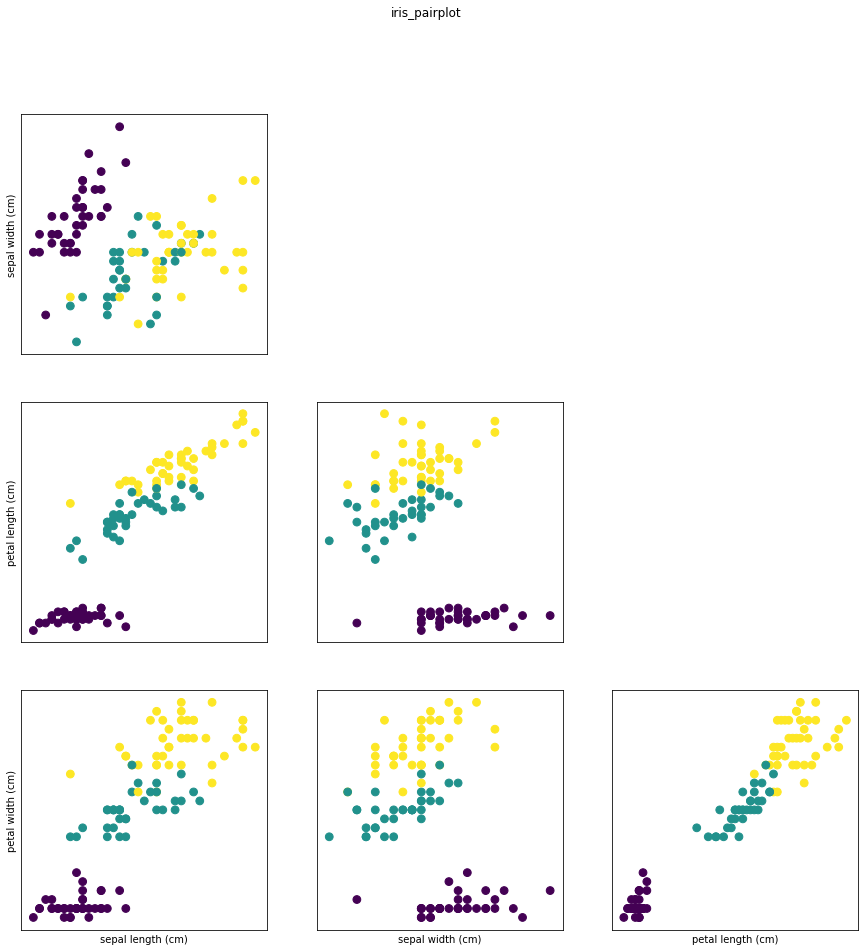

In [15]:
########## FIRST THINGS FIRST: LOOK AT YOUR DATA ##########
fig, ax  = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris_pairplot")

for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)

plt.show()

# We have constructed six plots above. They are:
# sepal width versus sepal length
# petal length versus sepal length
# petal width versus sepal length
# petal length versus sepal width
# petal width versus sepal width
# petal width versus petal length

# The three classes seem to be relatively well separated using the sepal and petal measurements.
# This means that a machine learning model will likely be able to learn to separate them.

In [16]:
########## BUILDING YOUR FIRST MODEL: k NEAREST NEIGHBORS ##########

# There are many classification algorithms in scikit-learn we could use. Here we will use a
# k nearest neighbors classifier.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# Fit the model fix(x,y) using x as training data and y as target values.
knn.fit(X_train, y_train)
# Make sure to check the KNeighborsClassifier documentation to understand the parameters below.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
########## MAKING PREDICTIONS ##########

# We can now make predictions using this model on new data, for which we might not know the correct labels.
# Imagine we found an iris in the wild with sepal length of 5 cm, sepal width of 2.9 cm, a petal length of
# 1 cm and a petal width of 0.2 cm.

X_new = np.array([[5, 2.9, 1, 0.2]])
print(X_new.shape)

(1, 4)


In [18]:
# To make prediction we call the predict method of the knn object.
prediction = knn.predict(X_new)
print(prediction)

[0]


In [19]:
# Our model predicts that this new iris belongs to the class 0, meaning its species ir Setosa.
print(iris['target_names'][prediction])

# But how do we know whether we can trust our model? We do not know the correct species of this sample, which
# is the whole point of building the model.

['setosa']


In [20]:
########## EVALUATING THE MODEL ##########

# There is where the test set we created earlier comes in. This data was not used to build the model,
# but we do know what the correct species are for each iris in the test set.

# We can make a prediction for an iris in the test data, and compare it against its label (the known species). We
# can measure how well the model works by computing the accuracy, which is the fraction of flowers for which the
# right species was predicted.
y_pred = knn.predict(X_test)
print(np.mean(y_pred == y_test))

0.973684210526


In [21]:
# We can also use the score method of the knn object, which will compute the test accuracy.
knn.score(X_test, y_test)

0.97368421052631582